In [ ]:
# Remember to upload optipaw_FINAL.csv

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Set options to display all unique values
# pd.set_option('display.max_rows', None)  # Display all rows
# pd.set_option('display.max_columns', None)  # Display all columns

# Load Optipaw Data
optipaw_data = pd.read_csv('optipaw_FINAL.csv')

# Extract rows where the 'State' column is 'Austin'
austin_data = optipaw_data[optipaw_data['State'] == 'Austin'].copy()

# Reset the index for the Austin data (optional but useful for clean DataFrames)
austin_data.reset_index(drop=True, inplace=True)

# Display the first few rows of the extracted data
print(austin_data.head())

  Animal.ID    Name Animal.Type                        Breed            Sex  \
0   A006100   Scamp         Dog         Spinone Italiano Mix  Neutered Male   
1   A006100   Scamp         Dog         Spinone Italiano Mix  Neutered Male   
2   A047759    Oreo         Dog                    Dachshund  Neutered Male   
3   A134067  Bandit         Dog            Shetland Sheepdog  Neutered Male   
4   A141142  Bettie         Dog  Labrador Retriever/Pit Bull  Spayed Female   

          Color   Age      Intake.Type     Outcome.Type          Intake.Date  \
0  Yellow/White   7.0    Public Assist  Return to Owner  2014-12-19 10:21:00   
1  Yellow/White   6.0    Public Assist  Return to Owner  2014-03-07 14:26:00   
2      Tricolor  10.0  Owner Surrender         Transfer  2014-04-02 15:55:00   
3   Brown/White  16.0    Public Assist  Return to Owner  2013-11-16 09:02:00   
4   Black/White  15.0            Stray  Return to Owner  2013-11-16 14:46:00   

          Outcome.Date   State  
0  2014-12-

In [ ]:
# Preprocessing Function for ML
def preprocessing(df, name_mapping_var=None):

  # For Name, we will use label encoding to assign each unique name a specific int, at the same time return the mapping
  # Strip leading asterisks from the Name column
  df['Name'] = df['Name'].str.lstrip('*')
  label_encoder = LabelEncoder()
  df['Name'] = label_encoder.fit_transform(df['Name'].astype(str))

  # If the user provided a variable to store the mapping, assign it
  if name_mapping_var is not None:
      name_mapping = {k: v for v, k in enumerate(label_encoder.classes_)}
      name_mapping_var.update(name_mapping)


  # For Animal.Type we will map Int Values to the specific animal type
  animal_mapping = {
    "Dog": 1, "Cat": 2, "Other": 3, "Bird": 4, "Livestock": 5,
    "House Rabbit": 6, "Rat": 7, "Ferret": 8, "Pig": 9, "Hamster": 10,
    "Guinea Pig": 11, "Gerbil": 12, "Hedgehog": 13, "Chinchilla": 14,
    "Goat": 15, "Mouse": 16, "Sugar Glider": 17, "Snake": 18,
    "Wildlife": 19, "Lizard": 20
    }

  df['Animal.Type'] = df['Animal.Type'].map(animal_mapping)

  # For Breed we will perform one hot encoding onto it
  # Remove parentheses and their contents, and replace '/' with space
  df['Breed'] = df['Breed'].str.replace(r'\(.*?\)', '', regex=True).str.replace('/', ' ').str.replace(',', ' ')

  # Split the 'Breed' column into a list and capitalize the first letter of each word
  df['Breed'] = df['Breed'].str.split().apply(lambda breeds: [breed.rstrip('-').capitalize() for breed in breeds])

  # Create dummy variables for each unique breed
  df_breeds = df['Breed'].str.join(' ').str.get_dummies(sep=' ')

  # Concatenate the original dataframe with the one-hot encoded breed dataframe
  df = pd.concat([df, df_breeds], axis=1)

  # Drop the original 'Breed' column
  df = df.drop(columns=['Breed'])

  # For Sex we will map Int Values to specific Sex
  sex_mapping = {'Neutered Male': 1, 'Spayed Female': 2, 'Intact Female': 3, 'Intact Male': 4, 'Unknown': 5, 'Female': 6, 'Male': 7}

  # Map the Sex column using the defined mapping
  df['Sex'] = df['Sex'].map(sex_mapping)

  # For colours, we will split into individual colours and use one hot encoding, which is assigning binary values to it

  # Split the 'Color' column by '/', 'and', and ','
  df['Color'] = df['Color'].str.replace('/', ' ').str.replace('and', ' ').str.replace(',', ' ').str.replace(r'-\b', '', regex=True)

  # Split the 'Color' column into a list and capitalize the first letter of each word
  df['Color'] = df['Color'].str.split().apply(lambda colors: [color.capitalize() for color in colors])

  # Create dummy variables for each unique color
  df_colors = df['Color'].str.join(' ').str.get_dummies(sep=' ')

  # Concatenate the original dataframe with the one-hot encoded color dataframe
  df = pd.concat([df, df_colors], axis=1)

  # Drop the original 'Color' column
  df = df.drop(columns=['Color'])

  # For Age, we will just store it as int and impute it with 0 if it is null, and store it as float
  df['Age'] = df['Age'].fillna(0).astype(float)

  # For Intake.Type, we will map Int Values to specific Intake
  intake_type_mapping = {
      'Public Assist': 1, 'Owner Surrender': 2, 'Stray': 3, 'Euthanasia Request': 4,
      'Abandoned': 5, 'Wildlife': 6, 'Moving': 7, 'Incompatible with owner lifestyle': 8,
      'Rabies Monitoring': 9, 'Marriage/Relationship split': 10, 'Owner Deceased': 11, 'Police Assist': 12,
      'Biting': 13, 'Owner Died': 14, 'TNR - Trap/Neuter/Release': 15, 'Unable to Afford': 16,
      'Unsuitable Accommodation': 17, 'Allergies': 18, 'Transfer from Other Shelter': 19,
      'Born in Shelter': 20, 'Landlord issues': 21, 'Litter relinquishment': 22, 'Sick/Injured': 23,
      'Owner requested Euthanasia': 24, 'Abuse/ neglect': 25, 'Incompatible with other pets': 26,
      'Behavioral Issues': 27, 'DOA': 28
  }

  # Map the Intake.Type column using the defined mapping
  df['Intake.Type'] = df['Intake.Type'].map(intake_type_mapping)

  # For Outcome.Type, we will map Int Values to specific Outcome
  outcome_type_mapping = {
      'Return to Owner': 1, 'Transfer': 2, 'Adoption': 3, 'Euthanasia': 4,
      'Died': 5, 'Rto-Adopt': 6, 'Disposal': 7, 'Missing': 8,
      'Stolen': 9, 'Relocate': 10, 'Lost': 11, 'Foster': 12,
      'Reclaimed': 13, 'Escaped': 14, 'Released To Wild': 15
  }

  # Map the Outcome.Type column using the defined mapping
  df['Outcome.Type'] = df['Outcome.Type'].map(outcome_type_mapping)

  # For Date and Time, we will be using panda and numpy date conversion

  # Convert Intake.Date and Outcome.Date to datetime format
  df['Intake.Date'] = pd.to_datetime(df['Intake.Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
  df['Outcome.Date'] = pd.to_datetime(df['Outcome.Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


  # Extract date components from the date columns
  df['Intake.Day'] = df['Intake.Date'].dt.day.fillna(0).astype(int)
  df['Intake.Month'] = df['Intake.Date'].dt.month.fillna(0).astype(int)
  df['Intake.Year'] = df['Intake.Date'].dt.year.fillna(0).astype(int)

  df['Outcome.Day'] = df['Outcome.Date'].dt.day.fillna(0).astype(int)
  df['Outcome.Month'] = df['Outcome.Date'].dt.month.fillna(0).astype(int)
  df['Outcome.Year'] = df['Outcome.Date'].dt.year.fillna(0).astype(int)

  # Extract and convert the hour to radians
  df['Intake.Hour'] = df['Intake.Date'].dt.hour.fillna(0).astype(int)
  df['Outcome.Hour'] = df['Outcome.Date'].dt.hour.fillna(0).astype(int)

  df['Intake.Hour.Radians'] = (df['Intake.Hour'] / 24) * 2 * np.pi
  df['Outcome.Hour.Radians'] = (df['Outcome.Hour'] / 24) * 2 * np.pi

  # Drop original date columns if no longer needed
  df = df.drop(columns=['Intake.Date', 'Outcome.Date'])

  return df

# Process Austin Dataset (Animal ID and State to be removed later)
austin_data = preprocessing(austin_data)

print(austin_data.head())


  Animal.ID   Name  Animal.Type  Sex   Age  Intake.Type  Outcome.Type   State  \
0   A006100  19560            1    1   7.0            1             1  Austin   
1   A006100  19560            1    1   6.0            1             1  Austin   
2   A047759  16845            1    1  10.0            2             2  Austin   
3   A134067   4665            1    1  16.0            1             1  Austin   
4   A141142   5095            1    2  15.0            3             1  Austin   

   Abyssinian  Affenpinscher  ...  Intake.Day  Intake.Month  Intake.Year  \
0           0              0  ...          19            12         2014   
1           0              0  ...           7             3         2014   
2           0              0  ...           2             4         2014   
3           0              0  ...          16            11         2013   
4           0              0  ...          16            11         2013   

   Outcome.Day  Outcome.Month  Outcome.Year  Intake.Hour

In [ ]:
# Unique value checks and Null value checks
# Print dtypes, unique and missing value checks before splitting
print(austin_data.dtypes)
print(austin_data.shape)
print(austin_data.nunique())
print(austin_data.isnull().sum())

Animal.ID                object
Name                      int64
Animal.Type               int64
Sex                       int64
Age                     float64
                         ...   
Outcome.Year              int64
Intake.Hour               int64
Outcome.Hour              int64
Intake.Hour.Radians     float64
Outcome.Hour.Radians    float64
Length: 436, dtype: object
(115498, 436)
Animal.ID               99642
Name                    23514
Animal.Type                 5
Sex                         5
Age                        42
                        ...  
Outcome.Year               12
Intake.Hour                24
Outcome.Hour               24
Intake.Hour.Radians        24
Outcome.Hour.Radians       24
Length: 436, dtype: int64
Animal.ID               0
Name                    0
Animal.Type             0
Sex                     0
Age                     0
                       ..
Outcome.Year            0
Intake.Hour             0
Outcome.Hour            0
Intake.Hour.Radia

In [ ]:
# Splitting austin_data based on Outcome.Year
train_data = austin_data[austin_data['Outcome.Year'] < 2023].copy()
test_data = austin_data[austin_data['Outcome.Year'] >= 2023].copy()

# Reset the index for both datasets
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Drop 'State' column from both train and test datasets
train_data = train_data.drop(columns=['State'])
test_data = test_data.drop(columns=['State'])

# Extract Animal.ID from the train_data and test_data
train_ids = train_data['Animal.ID']
test_ids = test_data['Animal.ID']

# Drop 'Animal.ID' from train_data and test_data
train_data = train_data.drop(columns=['Animal.ID'])
test_data = test_data.drop(columns=['Animal.ID'])

# Output the result to verify the split
print(train_data.head(5))
print(test_data.head(5))

print(train_ids.head(5))
print(test_ids.head(5))

print(train_data.shape)
print(test_data.shape)

# Split dataset to x_train, y_train and x_test, y_test
x_train = train_data.drop(columns=['Outcome.Type'])
y_train = train_data['Outcome.Type']
train_id = train_ids

x_test = test_data.drop(columns=['Outcome.Type'])
y_test = test_data['Outcome.Type']
test_id = test_ids




    Name  Animal.Type  Sex   Age  Intake.Type  Outcome.Type  Abyssinian  \
0  19560            1    1   7.0            1             1           0   
1  19560            1    1   6.0            1             1           0   
2  16845            1    1  10.0            2             2           0   
3   4665            1    1  16.0            1             1           0   
4   5095            1    2  15.0            3             1           0   

   Affenpinscher  Afghan  African  ...  Intake.Day  Intake.Month  Intake.Year  \
0              0       0        0  ...          19            12         2014   
1              0       0        0  ...           7             3         2014   
2              0       0        0  ...           2             4         2014   
3              0       0        0  ...          16            11         2013   
4              0       0        0  ...          16            11         2013   

   Outcome.Day  Outcome.Month  Outcome.Year  Intake.Hour  Outc

In [ ]:
# Scoring Function

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
import numpy as np
import pandas as pd

def scoring_function(y_pred_df, y_test_df, all_classes=None):
    '''
    Calculates various performance metrics for the predictions.

    Parameters:
    y_pred_df: DataFrame containing predictions.
    y_test_df: DataFrame containing true labels.
    all_classes: List of all possible classes.

    Returns:
    metrics: Dictionary containing accuracy, precision, recall, f1 score, and log loss.
    '''

    # Merge the prediction and actual outcome dataframes using Animal ID
    df_combined = pd.merge(y_pred_df, y_test_df, on='Animal.ID')

    if df_combined.empty:
        print("No data in the combined DataFrame.")
        return None

    # Convert the predicted probabilities into predicted classes (argmax)
    y_pred_class = df_combined.iloc[:, 1:-1].idxmax(axis=1).astype(int)
    y_true = df_combined['Outcome.Type'].astype(int)

    # If all_classes is None, use unique classes from y_true
    if all_classes is None:
        all_classes = np.unique(y_true)  # Get unique classes from y_true

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred_class)

    # Calculate metrics only for predicted classes
    unique_pred_classes = np.unique(y_pred_class)
    precision = precision_score(y_true, y_pred_class, average='weighted', zero_division=0, labels=unique_pred_classes)
    recall = recall_score(y_true, y_pred_class, average='weighted', zero_division=0, labels=unique_pred_classes)
    f1 = f1_score(y_true, y_pred_class, average='weighted', zero_division=0, labels=unique_pred_classes)

    # Ensure that y_pred_probs contains probabilities for all classes
    y_pred_probs = df_combined.iloc[:, 1:-1].values

    # Create an array to ensure all classes are represented in predictions
    complete_probs = np.zeros((y_pred_probs.shape[0], len(all_classes)))  # Initialize with zeros
    for i, class_label in enumerate(all_classes):
        if class_label in df_combined.columns:
            complete_probs[:, i] = y_pred_probs[:, class_label - 1]  # Fill with actual probabilities

    # Calculate log loss with all classes present in the labels
    logloss = log_loss(y_true, complete_probs, labels=all_classes)

    # Print the metrics
    print(f"\nAccuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Log Loss: {logloss:.4f}")

    # Return the metrics as a dictionary
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'log_loss': logloss
    }




In [ ]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


def perform_cross_validation(x_train, y_train, scoring_function, n_splits=5, n_repeats=10, save_path="neuralnetworkcv_results.csv"):
    """
    Perform repeated cross-validation, collect the scoring metrics, and save results to a CSV.

    Parameters:
    x_train: Training features
    y_train: Training labels (starting from 1)
    scoring_function: Function to compute the scoring metrics
    n_splits: Number of splits for K-fold cross-validation (default is 5)
    n_repeats: Number of times to repeat the cross-validation (default is 10)
    save_path: Path to save the CSV file (default is 'neuralnetworkcv_results.csv')

    Returns:
    results: A dictionary of lists where each list contains average values for the metrics (one per repetition)
    """
    # Convert y_train to 0-based indexing
    y_train_adjusted = y_train - 1  # Adjust to 0-based indexing for internal processing

    # Store metrics for all repetitions
    results = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': [],
        'log_loss': []
    }

    # DataFrame to hold all metrics across repetitions
    df_results = pd.DataFrame()

    # Repeat the cross-validation process n_repeats times
    for repeat in range(n_repeats):
        # Use a different random_state for KFold in each repetition to introduce variability
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=repeat)

        # Store metrics for each fold within this repetition
        fold_metrics = {
            'accuracy': [],
            'precision': [],
            'recall': [],
            'f1_score': [],
            'log_loss': []
        }

        # Perform K-fold cross-validation
        for train_idx, val_idx in kf.split(x_train):
            x_fold_train, x_fold_val = x_train.iloc[train_idx], x_train.iloc[val_idx]
            y_fold_train, y_fold_val = y_train_adjusted.iloc[train_idx], y_train_adjusted.iloc[val_idx]  # Use adjusted labels

            try:
                # One-hot encode the labels for training
                num_classes = 15  # Assuming classes from 1 to 15
                y_fold_train_encoded = to_categorical(y_fold_train, num_classes)

                # Initialize the Neural Network model
                model = Sequential()
                model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))  # Input layer
                model.add(Dense(32, activation='relu'))  # Hidden layer
                model.add(Dense(num_classes, activation='softmax'))  # Output layer

                # Compile the model
                model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

                # Train the model on the training fold
                model.fit(x_fold_train, y_fold_train_encoded, epochs=50, batch_size=32, verbose=0)

                # Predict probabilities for validation set
                y_val_pred_probs = model.predict(x_fold_val)

                # Prepare the DataFrame for scoring
                predicted_df = pd.DataFrame(y_val_pred_probs, columns=np.arange(1, num_classes + 1))  # Assuming classes from 1 to 15
                predicted_df.insert(0, 'Animal.ID', val_idx)  # Simulate Animal IDs using validation indices
                y_test_df = pd.DataFrame({
                    'Animal.ID': val_idx,
                    'Outcome.Type': y_fold_val.reset_index(drop=True) + 1  # Convert back to 1-based for the scoring function
                })

                # Use the scoring function
                metrics = scoring_function(predicted_df, y_test_df, all_classes=np.arange(1, num_classes + 1))

                # Collect metrics for this fold
                for key in fold_metrics.keys():
                    fold_metrics[key].append(metrics[key])

            except ValueError as e:
                if "Invalid classes inferred from unique values of `y`" in str(e):
                    continue  # Skip this fold if there's a class mismatch
                else:
                    continue  # Handle other errors as needed

        # Compute the average score for each metric across folds in this repetition
        avg_metrics = {key: np.mean(fold_metrics[key]) for key in fold_metrics.keys()}

        # Print the average scores for this repetition (including the repetition number)
        print(f"\nAverage Metrics for Repetition {repeat + 1}/{n_repeats}:")
        for key, value in avg_metrics.items():
            print(f"{key.capitalize()}: {value:.4f}")

        # Append the average scores for each repetition to the results
        for key in results.keys():
            results[key].append(avg_metrics[key])  # Append the average score for this repetition

        # Add results of this repetition to a DataFrame (for saving to CSV)
        avg_metrics['repetition'] = repeat + 1  # Add repetition number
        df_results = pd.concat([df_results, pd.DataFrame([avg_metrics])], ignore_index=True)

    # Save the DataFrame to a CSV file after all repetitions
    df_results.to_csv(save_path, index=False)

    return results


# Function to plot the cross-validation results and save the plot as an image
def plot_cross_validation_results(results, save_path="NeuralNetworkCV.png"):
    """
    Plot boxplots of the cross-validation results and save the plot as an image.

    Parameters:
    results: A dictionary containing lists of metrics collected from cross-validation.
    save_path: Path to save the plot image (default is 'boxplot.png').
    """
    # Convert results dictionary to DataFrame
    results_df = pd.DataFrame(results)

    # Create the boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=results_df)
    plt.title("Neural Network 5-Fold Cross-Validation Metrics")
    plt.ylabel("Score")

    # Save the plot as an image file
    plt.savefig(save_path, bbox_inches='tight')

    # Display the plot
    plt.show()

    print(f"Boxplot saved to {save_path}")



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.6374
Precision: 0.6202
Recall: 0.6596
F1 Score: 0.6327
Log Loss: 0.9217


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.6248
Precision: 0.6263
Recall: 0.6336
F1 Score: 0.5779
Log Loss: 0.9750


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.6214
Precision: 0.6252
Recall: 0.6430
F1 Score: 0.6274
Log Loss: 0.9586


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.6533
Precision: 0.6417
Recall: 0.6769
F1 Score: 0.6448
Log Loss: 0.8909


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Accuracy: 0.6169
Precision: 0.5748
Recall: 0.6390
F1 Score: 0.5807
Log Loss: 0.9817

Average Metrics for Repetition 1/10:
Accuracy: 0.6308
Precision: 0.6176
Recall: 0.6504
F1_score: 0.6127
Log_loss: 0.9456
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.5600
Precision: 0.5983
Recall: 0.7526
F1 Score: 0.5587
Log Loss: 1.1141


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.6223
Precision: 0.6314
Recall: 0.6441
F1 Score: 0.5693
Log Loss: 0.9553


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Accuracy: 0.6277
Precision: 0.6109
Recall: 0.6499
F1 Score: 0.6243
Log Loss: 0.9699
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Accuracy: 0.6145
Precision: 0.6178
Recall: 0.6356
F1 Score: 0.5609
Log Loss: 0.9833
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.6136
Precision: 0.6044
Recall: 0.6363
F1 Score: 0.5555
Log Loss: 0.9521

Average Metrics for Repetition 2/10:
Accuracy: 0.6076
Precision: 0.6126
Recall: 0.6637
F1_score: 0.5737
Log_loss: 0.9949


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.6153
Precision: 0.6206
Recall: 0.6374
F1 Score: 0.5731
Log Loss: 0.9703


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.6342
Precision: 0.6359
Recall: 0.6444
F1 Score: 0.6071
Log Loss: 0.9107


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.6418
Precision: 0.6270
Recall: 0.6512
F1 Score: 0.6028
Log Loss: 0.9266


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.5867
Precision: 0.5959
Recall: 0.6069
F1 Score: 0.4939
Log Loss: 0.9618


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Accuracy: 0.6301
Precision: 0.6168
Recall: 0.6528
F1 Score: 0.6071
Log Loss: 0.9285

Average Metrics for Repetition 3/10:
Accuracy: 0.6216
Precision: 0.6193
Recall: 0.6385
F1_score: 0.5768
Log_loss: 0.9396
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Accuracy: 0.6421
Precision: 0.6240
Recall: 0.6642
F1 Score: 0.6306
Log Loss: 0.9280
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.6183
Precision: 0.6299
Recall: 0.6282
F1 Score: 0.5765
Log Loss: 0.9948


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Accuracy: 0.6176
Precision: 0.6374
Recall: 0.6392
F1 Score: 0.5684
Log Loss: 0.9820
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Accuracy: 0.6300
Precision: 0.6170
Recall: 0.6525
F1 Score: 0.6277
Log Loss: 0.9524
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.5666
Precision: 0.6069
Recall: 0.5745
F1 Score: 0.5767
Log Loss: 1.0294

Average Metrics for Repetition 4/10:
Accuracy: 0.6149
Precision: 0.6230
Recall: 0.6317
F1_score: 0.5960
Log_loss: 0.9773


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Accuracy: 0.6386
Precision: 0.6224
Recall: 0.6610
F1 Score: 0.6233
Log Loss: 0.9280
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.6383
Precision: 0.6507
Recall: 0.6482
F1 Score: 0.6185
Log Loss: 0.9082


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Accuracy: 0.6228
Precision: 0.6238
Recall: 0.6441
F1 Score: 0.5892
Log Loss: 0.9712
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.6303
Precision: 0.6269
Recall: 0.6401
F1 Score: 0.5957
Log Loss: 0.9533


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.6391
Precision: 0.6237
Recall: 0.6621
F1 Score: 0.6150
Log Loss: 0.9110

Average Metrics for Repetition 5/10:
Accuracy: 0.6338
Precision: 0.6295
Recall: 0.6511
F1_score: 0.6083
Log_loss: 0.9343


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.6298
Precision: 0.6305
Recall: 0.6524
F1 Score: 0.6011
Log Loss: 0.9349
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.6470
Precision: 0.6387
Recall: 0.6696
F1 Score: 0.6359
Log Loss: 0.8941


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.6351
Precision: 0.6035
Recall: 0.6449
F1 Score: 0.5931
Log Loss: 0.9491


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Accuracy: 0.6462
Precision: 0.6312
Recall: 0.6702
F1 Score: 0.6155
Log Loss: 0.9076
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.6120
Precision: 0.6425
Recall: 0.6328
F1 Score: 0.5841
Log Loss: 0.9912

Average Metrics for Repetition 6/10:
Accuracy: 0.6340
Precision: 0.6293
Recall: 0.6540
F1_score: 0.6059
Log_loss: 0.9354
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Accuracy: 0.6468
Precision: 0.6275
Recall: 0.6690
F1 Score: 0.6212
Log Loss: 0.8987
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.6116
Precision: 0.6422
Recall: 0.6334
F1 Score: 0.5808
Log Loss: 1.0026


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Accuracy: 0.6578
Precision: 0.6378
Recall: 0.6797
F1 Score: 0.6348
Log Loss: 0.8978
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Accuracy: 0.6399
Precision: 0.6295
Recall: 0.6631
F1 Score: 0.6224
Log Loss: 0.9235
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.6226
Precision: 0.6163
Recall: 0.6452
F1 Score: 0.5860
Log Loss: 0.9591

Average Metrics for Repetition 7/10:
Accuracy: 0.6357
Precision: 0.6306
Recall: 0.6581
F1_score: 0.6090
Log_loss: 0.9364


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.6215
Precision: 0.6122
Recall: 0.6440
F1 Score: 0.5986
Log Loss: 0.9661


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Accuracy: 0.6142
Precision: 0.5981
Recall: 0.6360
F1 Score: 0.6142
Log Loss: 0.9998
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Accuracy: 0.6428
Precision: 0.6515
Recall: 0.6518
F1 Score: 0.6184
Log Loss: 0.9067
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.6022
Precision: 0.6087
Recall: 0.7738
F1 Score: 0.6811
Log Loss: 1.0129


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.6381
Precision: 0.6246
Recall: 0.6608
F1 Score: 0.6190
Log Loss: 0.9412

Average Metrics for Repetition 8/10:
Accuracy: 0.6238
Precision: 0.6190
Recall: 0.6733
F1_score: 0.6263
Log_loss: 0.9653


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Accuracy: 0.6284
Precision: 0.6383
Recall: 0.6498
F1 Score: 0.6035
Log Loss: 0.9642
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Accuracy: 0.6193
Precision: 0.6220
Recall: 0.6413
F1 Score: 0.5892
Log Loss: 0.9815
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.6165
Precision: 0.6193
Recall: 0.6260
F1 Score: 0.6162
Log Loss: 0.9361


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.6400
Precision: 0.6323
Recall: 0.6616
F1 Score: 0.6104
Log Loss: 0.9121


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.6368
Precision: 0.6456
Recall: 0.6606
F1 Score: 0.6244
Log Loss: 0.9218

Average Metrics for Repetition 9/10:
Accuracy: 0.6282
Precision: 0.6315
Recall: 0.6479
F1_score: 0.6087
Log_loss: 0.9431
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.6239
Precision: 0.6147
Recall: 0.6339
F1 Score: 0.5987
Log Loss: 0.9798


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Accuracy: 0.6393
Precision: 0.6389
Recall: 0.6616
F1 Score: 0.6102
Log Loss: 0.9186
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Accuracy: 0.6358
Precision: 0.6138
Recall: 0.6591
F1 Score: 0.6297
Log Loss: 0.9618
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.5988
Precision: 0.6156
Recall: 0.6186
F1 Score: 0.5157
Log Loss: 0.9711


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.6240
Precision: 0.5954
Recall: 0.6452
F1 Score: 0.5922
Log Loss: 0.9625

Average Metrics for Repetition 10/10:
Accuracy: 0.6244
Precision: 0.6157
Recall: 0.6437
F1_score: 0.5893
Log_loss: 0.9587


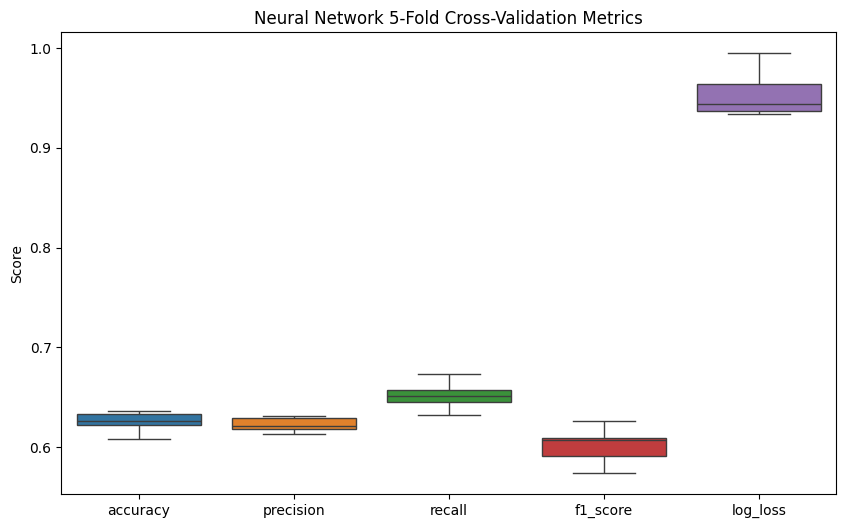

Boxplot saved to NeuralNetworkCV.png


In [ ]:
# Edit Here

x_train = x_train
y_train = y_train
train_id = train_id

x_test = x_test
y_test = y_test
test_id = test_id

# Call the cross-validation function
results = perform_cross_validation(x_train, y_train, scoring_function)
#print(results)

# Plot the results
plot_cross_validation_results(results)

In [ ]:
# Training and Predicting

x_train = x_train
print(x_train.head())
y_train = y_train
train_id = train_id

x_test = x_test
y_test = y_test
test_id = test_id

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.utils import resample

def neural_network_predict_proba(x_train, y_train, x_test, num_classes):
    '''
    Trains a Neural Network classifier on the training data, outputs validation accuracy,
    and returns predicted probabilities for the test set with numeric class labels.

    Parameters:
    x_train: Training features
    y_train: Training labels (starting from 1)
    x_test: Test features for which to predict probabilities
    num_classes: Number of classes for the output layer

    Returns:
    predicted_df: A DataFrame with predicted probabilities for each class (numeric labels)
    validation_accuracy: Accuracy score on the validation set
    '''

    # Check class distribution and resample if necessary
    class_counts = y_train.value_counts()
    if any(class_counts < 2):
        # For classes with fewer than 2 samples, consider removing them or resampling
        y_train = y_train[y_train.isin(class_counts[class_counts > 1].index)]
        x_train = x_train.loc[y_train.index]

    # Split the data into training and validation sets (80% train, 20% validation)
    try:
        x_train_split, x_val, y_train_split, y_val = train_test_split(
            x_train, y_train, test_size=0.2, random_state=42, stratify=y_train
        )
    except ValueError:
        # If stratification fails, fall back to a simple split without stratification
        x_train_split, x_val, y_train_split, y_val = train_test_split(
            x_train, y_train, test_size=0.2, random_state=42
        )

    # One-hot encode the labels for training
    y_train_split_encoded = to_categorical(y_train_split - 1, num_classes)
    y_val_encoded = to_categorical(y_val - 1, num_classes)

    # Initialize the Neural Network model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))  # Input layer
    model.add(Dense(32, activation='relu'))  # Hidden layer
    model.add(Dense(num_classes, activation='softmax'))  # Output layer

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model on the training split
    model.fit(x_train_split, y_train_split_encoded, epochs=50, batch_size=32, verbose=0)

    # Evaluate on the validation set
    val_loss, val_accuracy = model.evaluate(x_val, y_val_encoded, verbose=0)

    # Predict probabilities on the test set
    y_pred_probs = model.predict(x_test)

    # Create a DataFrame for predicted probabilities with numeric class labels
    predicted_df = pd.DataFrame(y_pred_probs, columns=np.arange(1, num_classes + 1))  # Columns for classes 1 to num_classes

    # Impute any missing classes with zero probabilities
    for class_label in range(1, num_classes + 1):
        if class_label not in predicted_df.columns:
            predicted_df[class_label] = 0.0  # Assign zero probability to missing classes

    return predicted_df, val_accuracy

# Example usage:
num_classes = 15
y_pred_probs, validation_accuracy = neural_network_predict_proba(x_train, y_train, x_test, num_classes)


# Continue with your existing code
if y_pred_probs is not None:
    y_pred_df = y_pred_probs.copy()
    y_pred_df.insert(0, 'Animal.ID', test_id.reset_index(drop=True))
    print(y_pred_df.head())
    y_pred_df.to_csv("NNy_pred_df.csv", index=False)

    y_test_df = pd.DataFrame({
        'Animal.ID': test_id.reset_index(drop=True),
        'Outcome.Type': y_test.reset_index(drop=True)  # No need for inverse mapping
    })

    print(y_test_df.head())

    # Final Scoring
    print("Neural Network")
    neural_network_score = scoring_function(y_pred_df, y_test_df)

    # Convert the dictionary to a DataFrame
    neural_network_score_df = pd.DataFrame([neural_network_score])

    # Save the DataFrame to a CSV file
    neural_network_score_df.to_csv("neural_network_score.csv", index=False)
    print("Neural Network score saved to 'neural_network_score.csv'")

    Name  Animal.Type  Sex   Age  Intake.Type  Abyssinian  Affenpinscher  \
0  19560            1    1   7.0            1           0              0   
1  19560            1    1   6.0            1           0              0   
2  16845            1    1  10.0            2           0              0   
3   4665            1    1  16.0            1           0              0   
4   5095            1    2  15.0            3           0              0   

   Afghan  African  Airedale  ...  Intake.Day  Intake.Month  Intake.Year  \
0       0        0         0  ...          19            12         2014   
1       0        0         0  ...           7             3         2014   
2       0        0         0  ...           2             4         2014   
3       0        0         0  ...          16            11         2013   
4       0        0         0  ...          16            11         2013   

   Outcome.Day  Outcome.Month  Outcome.Year  Intake.Hour  Outcome.Hour  \
0           

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


434/434 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
  Animal.ID         1         2         3         4         5         6  \
0   A454956  0.441031  0.164901  0.325127  0.049847  0.005348  0.012963   
1   A478575  0.519924  0.101264  0.307639  0.051936  0.002792  0.016205   
2   A478962  0.415983  0.188511  0.327198  0.048759  0.006414  0.012017   
3   A480389  0.434427  0.170970  0.325838  0.049579  0.005616  0.012710   
4   A495162  0.450733  0.156191  0.323871  0.050215  0.004971  0.013339   

          7         8         9            10            11            12  \
0  0.000241  0.000455  0.000086  1.529866e-22  3.887786e-21  6.335461e-22   
1  0.000055  0.000171  0.000013  2.507316e-29  2.878858e-27  1.982937e-28   
2  0.000369  0.000600  0.000148  1.516420e-20  2.470424e-19  5.189304e-20   
3  0.000271  0.000490  0.000100  5.208092e-22  1.175661e-20  2.049908e-21   
4  0.000204  0.000407  0.000070  2.481638e-23  7.518648e-22  1.108203e-22   

             13            14            15  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
